In [102]:
import pandas as pd
import numpy as np

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import os

data_dir = 'Data'
P_cols = ['age_calculated',  'male', 'female',]

o_col = ['ncipr_min_osat',]
    
    
S_cols = ['Bluish Lips/Face',
       'Chest Pressure/Chest Pain', 'Chills or Shaking',
       'Complete Loss of Smell (Anosmia)', 'Complete Loss of Taste (Ageusia)',
       'Confusion or Inability to Arouse', 'Cough',
       'Diarrhea (>=3 loose/looser than normal stools/24 hr. period)',
       'Ear pain', 'Eye Redness with or without Discharge',
       'Fever (>100.4 F/38 C)', 'Headache', 'Muscle Pain/Body Aches',
       'Nausea or Vomiting', 'None of these apply', 'Other',
       'Partial Loss of Smell (Partial Anosmia)',
       'Partial Loss of Taste (Partial Ageusia)',
       'Runny Nose/Sinus Congestion',
       'Shortness of Breath/Difficulty Breathing', 'Skin rash or Skin ulcers',
       'Sneezing', 'Sore Throat', 'Unusual Fatigue/Lethargy', 'Wheezing',
       # immune system health concerns
'pregnancy',
'respiratory health concerns (e.g.',
'high blood pressure',
'diabetes',
'cardiac health concerns',
'cancer',
]

C_cols = [
    'Pneumonia (Bacterial or Viral)',
            'Inadequate Oxygen or Hypoxia',
            'Cardiac Problems (Cardiomyopathy',
            'Acute Respiratory Distress Syndrome',
            'Hyperglycemia/ Hypoglycemia (Abnormal Blood Sugar)',
            'Anemia (Lack of red blood cells or hemoglobin)',
            'Water in the Lungs (Pleural effusion)',
            'Kidney Injury or Failure',
            'Heart Inflammation (Endocarditis',
            'Liver Dysfunction',
            'Sepsis (serious infection that causes your immune system to attack your body)',
            'Bleeding in digestive tract (Gastrointestinal Hemorrhage)',
            'Collapsed Lung (Pneumothorax)',
            'Inflammation or infection of the brain or meninges (Meningitis / Encephalitis)',
            'Stroke / Cerebrovascular accident',
            'Seizure',
            ]

y_col =['ncipr_how_severe_self']

a_col = ['oxygen_administered']
T_cols = a_col + []


data_path = os.path.join(data_dir, 'covid_data.pickle')

covid_df = pd.read_pickle(data_path).astype(np.float32)

In [103]:
covid_df.columns.tolist()

['age_calculated',
 'ncipr_min_osat',
 'ncipr_how_severe_self',
 'oxygen_administered',
 'male',
 'female',
 'Bluish Lips/Face',
 'Chest Pressure/Chest Pain',
 'Chills or Shaking',
 'Complete Loss of Smell (Anosmia)',
 'Complete Loss of Taste (Ageusia)',
 'Confusion or Inability to Arouse',
 'Cough',
 'Diarrhea (>=3 loose/looser than normal stools/24 hr. period)',
 'Ear pain',
 'Eye Redness with or without Discharge',
 'Fever (>100.4 F/38 C)',
 'Headache',
 'Muscle Pain/Body Aches',
 'Nausea or Vomiting',
 'None of these apply',
 'Other',
 'Partial Loss of Smell (Partial Anosmia)',
 'Partial Loss of Taste (Partial Ageusia)',
 'Runny Nose/Sinus Congestion',
 'Shortness of Breath/Difficulty Breathing',
 'Skin rash or Skin ulcers',
 'Sneezing',
 'Sore Throat',
 'Unusual Fatigue/Lethargy',
 'Wheezing',
 ' Cardiac ischemia/arrhythmia',
 ' Myocarditis',
 ' Pericarditis)',
 ' heart failure)',
 'Acute Respiratory Distress Syndrome',
 'Anemia (Lack of red blood cells or hemoglobin)',
 'Bleeding

In [104]:
def get_process_data(data_path,P_cols,S_cols, o_col, C_cols, a_col, y_col, test_size=0.2, random_state=23423,):
    covid_df = pd.read_pickle(data_path).astype(np.float32)

    if test_size == 0.0:
        train_df = shuffle(covid_df, random_state=random_state)
        test_df = pd.DataFrame(columns=train_df.columns)
    else:    
        train_df, test_df = train_test_split(covid_df, test_size=test_size, random_state=random_state)

    train_dic = {'P':train_df[P_cols],
                'S':train_df[S_cols],
                'o':train_df[o_col],
                'C':train_df[C_cols],
                'T':train_df[a_col],
                'y':train_df[y_col]
                }

    test_dic = {'P':test_df[P_cols],
                'S':test_df[S_cols],
                'o':test_df[o_col],
                'C':test_df[C_cols],
                'T':test_df[a_col],
                'y':test_df[y_col]
                }
    return train_dic, test_dic

In [105]:
# pd.concat(train_dic, axis=1)

In [106]:
train_dic, test_dic = get_process_data(data_path,P_cols,S_cols, o_col, C_cols, a_col, y_col, test_size=0.0)

In [107]:
# model_spec = f"""
#     # measurement model
#     U_a =~ {" + ".join(X_cols)} + {" + ".join(a_col)})
#     U_y =~ {" + ".join(X_cols)} + {" + ".join(a_col)}) + {" + ".join(y_col)})


# """

In [108]:
# " + ".join(a_col)

In [109]:
# inputs = keras.Input(shape=(len(X_cols,)))
# a = keras.layers.Dense(1, activation=None)(inputs)

# y = keras.layers.Dense(1)(keras.layers.Concatenate()([inputs, a]))

# model = keras.Model(inputs = inputs, outputs=[a,y])

# model.compile(loss='mse')

In [110]:
# model.summary()

In [111]:
# history = model.fit(x=train_dic['X'], y=[train_dic['a'], train_dic['y']], epochs=100, validation_data=(test_dic['X'], [test_dic['a'], test_dic['y']]))

In [112]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['dense_1_loss'])
# plt.plot(history.history['val_dense_1_loss'])
# plt.title('model mse')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

In [113]:
# history.history['val_dense_1_loss'][np.argmin(history.history['dense_1_loss'])]

In [114]:
train_dic['y'].describe()

,ncipr_how_severe_self
count,1747.000000
mean,1.503721
std,1.433267
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


In [115]:
# import keras.backend as K

# def customLoss(yTrue,yPred):
#     return K.sum(K.log(yTrue) - K.log(yPred))

In [116]:
import seaborn as sns

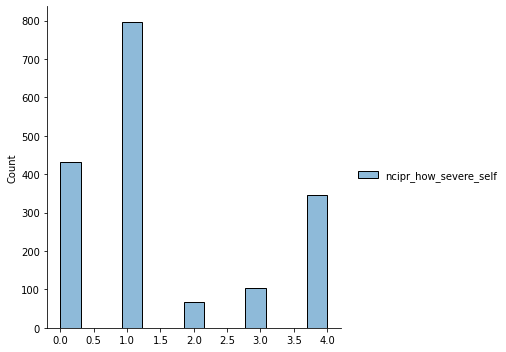

In [117]:
sns.displot(train_dic['y'])

In [118]:
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [119]:
kf = KFold(n_splits=5)
mses = []
for i, (train_index, test_index) in enumerate(kf.split(pd.concat(train_dic, axis=1))):
    a_in = np.hstack((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index]))
    a_out = train_dic['T'].iloc[train_index]
    a_model = LinearRegression().fit(a_in, a_out)

    y_in = np.concatenate((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], train_dic['T'].iloc[train_index]), axis=1)
    y_out = train_dic['y'].iloc[train_index]
    y_model = LinearRegression().fit(y_in, y_out)
    
    y_hat = y_model.predict(np.concatenate((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], train_dic['T'].iloc[test_index]), axis=1))
    

    mses.append(mean_squared_error(y_hat, train_dic['y'].iloc[test_index]))
    print(f'fold {i} mse: ', mses[-1])
    
    


fold 0 mse:  1.376475
fold 1 mse:  1.310094
fold 2 mse:  1.3872316
fold 3 mse:  1.3524448
fold 4 mse:  1.2903551


In [120]:
np.mean(mses)

1.3433201

In [121]:
a_model = LinearRegression().fit(np.hstack((train_dic['P'], train_dic['S'])), train_dic['T'])
a_hat = a_model.predict(np.hstack((train_dic['P'], train_dic['S'])))#.reshape(-1, 1)
y_model = LinearRegression().fit(np.concatenate((train_dic['P'], train_dic['S'], train_dic['T']), axis=1), train_dic['y'])
# y_hat = y_model.predict(np.concatenate((train_dic['X'], train_dic['S'], a_model.predict(np.hstack((train_dic['X'], train_dic['S'])))), axis=1))
y_hat = y_model.predict(np.concatenate((train_dic['P'], train_dic['S'], train_dic['T']), axis=1))


In [122]:
# Abduction

U_a = train_dic['T'] - a_hat
U_y = train_dic['y'] - y_hat

In [123]:
# Action, Prediction
a_TO0 = a_hat + U_a
a_TO0.iloc[:,T_cols.index(a_col[0])] = 0.0
y_TO0 = y_model.predict(np.concatenate((train_dic['P'], train_dic['S'], a_TO0,), axis=1)) + U_y

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

In [146]:
def plot_change():
    train_df = pd.concat(train_dic, axis=1)
    train_df['y_TO0'] = y_TO0
    train_ox_df = train_df[train_df[('T', a_col[0])] == 1.0]

    plt.figure()
    bland_altman_plot( train_ox_df['y_TO0'].values.flatten(), train_ox_df['y'].values.flatten(),)
    # plt.ylim(-5, 5)

    plt.figure()
    sns.displot(data=train_ox_df[['y', 'y_TO0']], kind='kde', bw_method=0.2866534)

In [147]:
train_df['y'].describe()

,ncipr_how_severe_self
count,1747.000000
mean,1.503721
std,1.433267
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


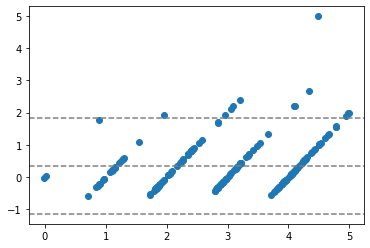

<Figure size 432x288 with 0 Axes>

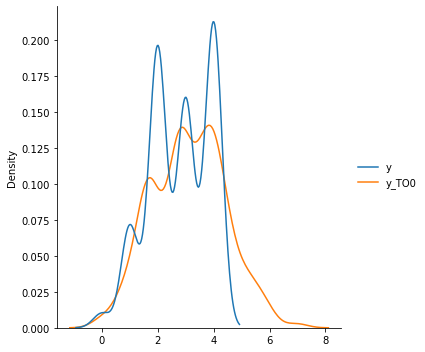

In [148]:
plot_change()

## Complicated DAG


In [127]:
kf = KFold(n_splits=5)
mses = []
for i, (train_index, test_index) in enumerate(kf.split(pd.concat(train_dic, axis=1))):
    t_in = np.hstack((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index]))
    t_out = train_dic['T'].iloc[train_index]
    t_model = LinearRegression().fit(t_in, t_out)
    t_hat = t_model.predict(t_in)

    # c_in = np.hstack((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], t_hat,))
    # c_out = train_dic['C'].iloc[train_index]
    # c_model = LinearRegression().fit(c_in, c_out)
    # # c_hat = c_model.predict(c_in)
    # # c_hat = np.clip(c_hat, 0, 1)


    o_in = np.hstack((train_dic['S'].iloc[train_index], t_hat,))
    o_out = train_dic['o'].iloc[train_index]
    o_model = LinearRegression().fit(o_in, o_out)
    o_hat = o_model.predict(o_in)


    y_in = np.concatenate((train_dic['P'].iloc[train_index], train_dic['S'].iloc[train_index], o_hat), axis=1)
    y_out = train_dic['y'].iloc[train_index]
    y_model = LinearRegression().fit(y_in, y_out)
    # y_model = LinearRegression().fit(np.concatenate((train_dic['X'].iloc[train_index], train_dic['S'].iloc[train_index], a_hat), axis=1), train_dic['y'].iloc[train_index])
    
    t_hat = t_model.predict(np.hstack((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index]))).reshape(-1,1)
    

    # c_hat = c_model.predict(np.hstack((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], t_hat,)))
    # c_hat = np.clip(c_hat, 0, 1)
    o_hat = o_model.predict(np.hstack((train_dic['S'].iloc[test_index], t_hat)))

    y_in = np.concatenate((train_dic['P'].iloc[test_index], train_dic['S'].iloc[test_index], o_hat), axis=1)
    y_out = train_dic['y'].iloc[test_index]
    y_hat = y_model.predict(y_in)
    

    mses.append(mean_squared_error(y_hat, y_out))
    print(f'fold {i} mse: ', mses[-1])

fold 0 mse:  1.4301009
fold 1 mse:  1.3278826
fold 2 mse:  1.4227605
fold 3 mse:  1.3722998
fold 4 mse:  1.3012418


In [128]:
np.mean(mses)

1.3708571

In [129]:
t_in = np.hstack((train_dic['P'], train_dic['S']))
t_out = train_dic['T']
t_model = LinearRegression().fit(t_in, t_out)
t_hat = t_model.predict(t_in).reshape(-1,1)

# c_in = np.hstack((train_dic['P'], train_dic['S'], t_hat,))
# c_out = train_dic['C']
# c_model = LinearRegression().fit(c_in, c_out)
# c_hat = c_model.predict(c_in)
# c_hat = np.clip(c_hat, 0, 1)

o_in = np.hstack((train_dic['S'], t_hat))
o_out = train_dic['o']
o_model = LinearRegression().fit(o_in, o_out)
o_hat = o_model.predict(o_in)



y_in = np.concatenate((train_dic['P'], train_dic['S'], o_hat), axis=1)
y_out = train_dic['y']
y_model = LinearRegression().fit(y_in, y_out)
# y_model = LinearRegression().fit(np.concatenate((train_dic['X'].iloc[train_index], train_dic['S'].iloc[train_index], a_hat), axis=1), train_dic['y'].iloc[train_index])


### Abduction

In [130]:

t_hat = t_model.predict(np.hstack((train_dic['P'], train_dic['S']))).reshape(-1,1)
# c_hat = c_model.predict(np.hstack((train_dic['P'], train_dic['S'], t_hat,)))
o_hat = o_model.predict(np.hstack((train_dic['S'], t_hat)))

y_in = np.concatenate((train_dic['P'], train_dic['S'], o_hat), axis=1)
y_out = train_dic['y']
y_hat = y_model.predict(y_in)

In [131]:
U_t = train_dic['T'] - t_hat 
U_o = train_dic['o'] - o_hat 
# U_c = train_dic['C'] - c_hat 
U_y = train_dic['y'] - y_hat

### Action

In [132]:
t_O0 = t_hat + U_t
t_O0.iloc[:,T_cols.index(a_col[0])] = 0.0


### Prediction

In [133]:

# c_hat = c_model.predict(np.hstack((train_dic['P'], train_dic['S'], t_hat))) + U_c
# c_hat = np.clip(c_hat, 0, 1)
o_hat = o_model.predict(np.hstack((train_dic['S'], t_hat, ))) + U_o


y_in = np.concatenate((train_dic['P'], train_dic['S'], o_hat), axis=1)
# y_out = train_dic['y']
y_TO0 = y_model.predict(y_in) + U_y

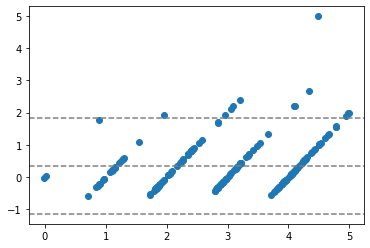

<Figure size 432x288 with 0 Axes>

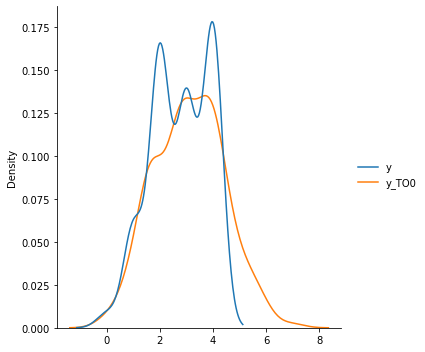

In [134]:
plot_change()